#### Read CSV file and Clean the dataset

In [14]:
import pandas as pd
df = pd.read_csv('techstore_sales.csv', sep = ',')
print(df.head())
print(df.info())
print(df.describe())

   order_id  order_date   product  quantity  price_per_unit
0      1001  2024-01-05    Laptop         1            1200
1      1002  2024-01-17     Mouse         2              25
2      1003  2024-02-03  Keyboard         1              45
3      1004  2024-02-09   Monitor         1             300
4      1005  2024-02-25    Laptop         1             200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        10 non-null     int64 
 1   order_date      10 non-null     object
 2   product         10 non-null     object
 3   quantity        10 non-null     int64 
 4   price_per_unit  10 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 532.0+ bytes
None
         order_id   quantity  price_per_unit
count    10.00000  10.000000       10.000000
mean   1005.50000   1.300000      352.000000
std       3.02765   0.483046      46

In [15]:
print(df.isnull().sum())

order_id          0
order_date        0
product           0
quantity          0
price_per_unit    0
dtype: int64


In [16]:
print(df.duplicated().sum())

0


In [17]:
df['order_date'] = pd.to_datetime(df['order_date'], errors = 'coerce')

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        10 non-null     int64         
 1   order_date      10 non-null     datetime64[ns]
 2   product         10 non-null     object        
 3   quantity        10 non-null     int64         
 4   price_per_unit  10 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 532.0+ bytes
None


### Create a new column 'total_revenue' and Find the top 5 products by total revenue


In [19]:
df['total_revenue'] = df['quantity'] * df['price_per_unit']
df.head()

,order_id,order_date,product,quantity,price_per_unit,total_revenue
0,1001,2024-01-05,Laptop,1,1200,1200
1,1002,2024-01-17,Mouse,2,25,50
2,1003,2024-02-03,Keyboard,1,45,45
3,1004,2024-02-09,Monitor,1,300,300
4,1005,2024-02-25,Laptop,1,200,200


In [25]:
top_products = df.groupby('product')['total_revenue'].sum().sort_values(ascending = False).head(5)
print(top_products)

product
Laptop      2600
Monitor      600
Printer      400
Keyboard      95
Mouse         75
Name: total_revenue, dtype: int64


### Calculate Average revenue per order

In [26]:
avg_revenue = df['total_revenue'].mean()
print(avg_revenue)

377.0


### Visualization: Top products by total revenue

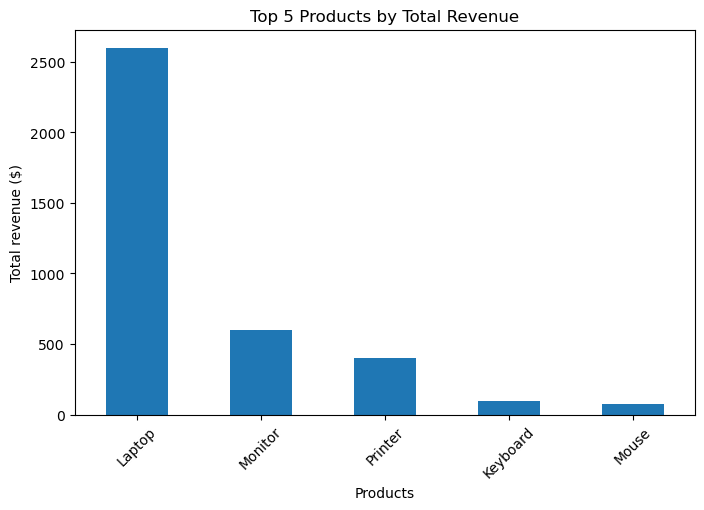

In [36]:
import matplotlib.pyplot as plt

top_products.plot(kind = 'bar', figsize =(8, 5))
plt.title('Top 5 Products by Total Revenue')
plt.xlabel('Products')
plt.ylabel('Total revenue ($)')
plt.xticks(rotation=45)

plt.show()